# Decision Tree Tutorial

In this tutorial, we will be going through a simple example of how to create a decision tree model using the Scikit-learn library in Python. Decision trees are a type of model used for both classification and regression tasks. They are called decision trees because they make decisions by splitting data into subsets based on feature values, which can be visualized as a tree structure.

We will be using the Iris dataset for this tutorial, which is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals, in centimeters.

N.B. We will be skipping many of the steps in training a model in order to better focus on one concept at time.

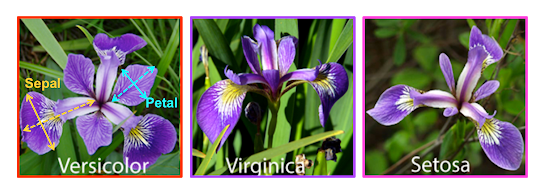

In [5]:
Image(filename="iris dataset.png")

In [4]:
# These are the packages we need to handle the data and classification. Notice that pandas is always imported as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris

In [19]:
# These are the packages we will use to understand our results. Note that we import pyplot from matplotlib as plt and seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

## Introduction to Pandas

Pandas is a powerful data manipulation library in Python that provides data structures and functions needed to manipulate and analyze structured data. It's built on top of two core Python libraries - Matplotlib for data visualization and NumPy for mathematical operations.

Pandas introduces two useful (and powerful) structures to Python - Series and DataFrame, both of which are built on top of NumPy.

A **Series** is a one-dimensional object similar to an array, list, or column in a table. It assigns a labeled index to each item in the list.

A **DataFrame** is a two-dimensional object similar to a spreadsheet or an SQL table. This is the most commonly used pandas object. You can think of a DataFrame as a group of Series that share an index (the column names).

With pandas, you can do things like:

- Easily read and write from and to CSV files, or even databases
- Handle missing data representation
- Convert data formats
- Perform database operations like merge, join, group, sort, etc.
- It's also incredibly fast, as it's built on top of NumPy

In this tutorial, we use pandas to load the Iris dataset into a DataFrame for use with the Scikit-learn library.

I, personally, hate Pandas, but there is literally no alternative.


## Loading the Dataset

Our first step is to load the dataset into a dataframe. Dataframes are always names, unhelpfully and unfortunately, `df`. When importing a dataset it is a good idea to look at the first five rows of the dataset `df.head()` to make sure the data you loaded has the shape you expected and to look at a few statistics `df.describe()` to make sure it passes the "sniff test." 

Also notice that we had to `print(df.head())` but we did not need to do so for `df.describe()`. This is because the return value of the last line of a Jupyter cell is always displayed.

In [11]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())
df.describe()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Building the Decision Tree Model

### Let's do it right this.
We will now build our decision tree model by constructing our model. But before we call our `fit` function, we will first "split" our data into training and test sets. We will attempt to learn the labels in the training set. However, we will evaluate our performance against the test set. 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'], random_state=0)

In [24]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Making Predictions

Now that we have trained our model, let's look at its predictions _on the held out test data_ and see how well we did _on the held out test labels_.

This is still really, really good, but that's just because this is a toy problem known to work well.

In [25]:
y_pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy:0.02f}")

0.89


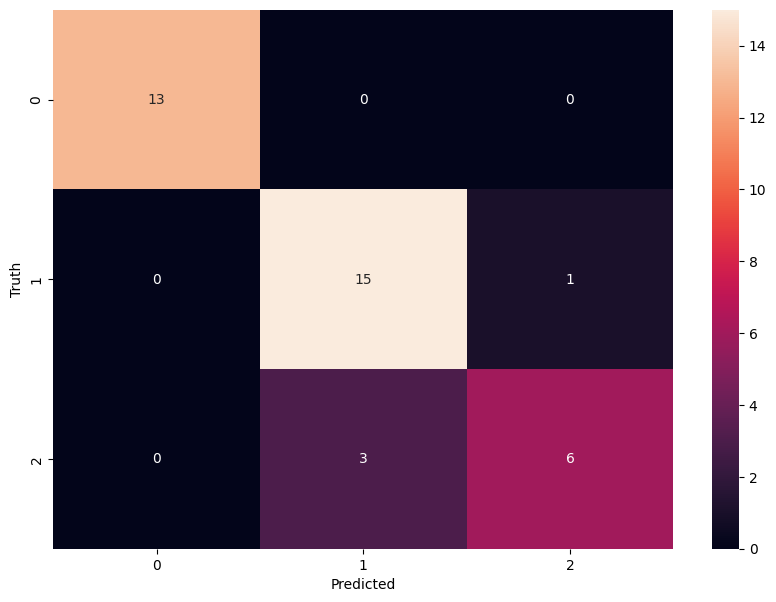

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Our predictions our now merely really, really good

This is a simple problem and our simple model performs very well on our holdout data.